<a href="https://colab.research.google.com/github/claudia2320/MASTERS-PROJECT/blob/main/EV_MODELLING.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import necessary libraries
import numpy as np
import pandas as pd
from scipy.optimize import minimize
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from IPython.core.display import display, HTML

# Define Market Variants

These are guesses for each p market variants

NOTE: these are assumed for the purpose of writing the code but will have to be changed in correlation to JLR's models

In [ ]:
# Define vehicle variants with attributes
vehicle_variants = {
    "p1": [50, 600, 3.5, 250, 0.3],  # Compact SUV
    "p2": [55, 650, 3.8, 270, 0.35],  # Midsize SUV
    "p3": [60, 700, 4.0, 300, 0.4],   # Full-size SUV
}

# Prices and expected market demand
prices = [49900, 61600, 80000]
demands = [140000, 100000, 80000]

# Function to display styled DataFrame
def display_styled_dataframe(df, title):
    """
    Display a formatted DataFrame with improved readability.

    Parameters:
    df (pd.DataFrame): The DataFrame to be displayed.
    title (str): Title of the table.
    """
    styled_df = df.style.set_table_styles([
        {'selector': 'th', 'props': [
            ('font-family', 'DM Sans'),
            ('font-size', '15px'),
            ('text-align', 'center'),
            ('background-color', '#4990F3'),
            ('color', 'white'),
            ('padding', '10px')
        ]},
        {'selector': 'td', 'props': [
            ('font-family', 'DM Sans'),
            ('font-size', '13px'),
            ('text-align', 'center'),
            ('background-color', '#9FADF2'),
            ('color', 'white'),
            ('padding', '8px')
        ]}
    ]).set_properties(**{
        'border': '1px solid black',
        'padding': '8px'
    })

    display(HTML(f"<h3 style='color: #4990F3; font-family: DM Sans;'>{title}</h3>"))
    display(styled_df)

# Create DataFrame from vehicle variants dictionary
df_design_variables = pd.DataFrame.from_dict(vehicle_variants, orient="index",
                                             columns=["BC (Battery Capacity)", "PW (Platform Weight)",
                                                      "MP (Motor Power)", "ID (Interior Dimensions)",
                                                      "CD (Aerodynamic Coefficient)"])

# Display formatted table
display_styled_dataframe(df_design_variables, "Design Variables for Vehicle Variants")



,BC (Battery Capacity),PW (Platform Weight),MP (Motor Power),ID (Interior Dimensions),CD (Aerodynamic Coefficient)
p1,50,600,3.500000,250,0.300000
p2,55,650,3.800000,270,0.350000
p3,60,700,4.000000,300,0.400000


# Define the Critical Attributes Function J_U_veh

This function calculates the critical attributes (IE, RM, FE, AC) based on the design variables.

We get an output between 0-1, since they are normalised

***NOTE: the values for the design variables are placeholders, need to change based on data or expert opinions***

- IE: prioritises interior dimensions (ID), with a small influence from battery capacity (BC)
  . A high value indicates very good accessibility

- RM: depends on roominess (ID) but gives more weight to battery capacity (BC)
  - A high value indicates that it provides high sense of roomines

- FE: reflects battery efficiency (BC), reduced by platform weight (PW) and drag (CD)
  - A high value indicates excellent efficiency for the given design variables

- AC: measures acceleration, driven by motor power (MP) and slightly offset by weight (PW)
  - A high value indicates strong acceleration capabilities

In [ ]:
# Define Critical Attributes Function
def critical_attributes(x):
    """
    Calculate critical attributes based on design variables.

    Parameters:
        x: List of design variables [BC, PM, IO, MP, CD].
    Returns:
        List of calculated critical attributes [RM, IE, FE, AC].
    """
    BC, PM, IO, MP, CD = x  # Unpack design variables

    # Critical Attributes Equations
    RM = (0.7 * IO + 0.3 * BC) / (0.7 * 4.0 + 0.3 * 60)
    IE = (0.6 * IO + 0.2 * BC - 0.1 * PM) / (0.6 * 4.0 + 0.2 * 60 - 0.1 * 700)
    FE = (0.8 * BC - 0.3 * PM - 0.2 * CD) / (0.8 * 60 - 0.3 * 700 - 0.2 * 0.4)
    AC = (0.7 * MP - 0.2 * PM) / (0.7 * 300 - 0.2 * 700)

    # Ensure values are within range [0, 1]
    RM = max(0, min(RM, 1))
    IE = max(0, min(IE, 1))
    FE = max(0, min(FE, 1))
    AC = max(0, min(AC, 1))

    # Debugging
    print(f"\033[38;5;33mDesign Variables:\033[0m {x}")
    print(f"\033[38;5;33mCalculated Attributes:\033[0m RM: {RM}, IE: {IE}, FE: {FE}, AC: {AC}")

    return [RM, IE, FE, AC]

# Define vehicle variants
vehicle_variants = {
    "p1": [50, 600, 3.5, 250, 0.3],  # Compact SUV
    "p2": [55, 650, 3.8, 270, 0.35],  # Midsize SUV
    "p3": [60, 700, 4.0, 300, 0.4],   # Full-size SUV
}

# Compute attributes for each vehicle variant
critical_attributes_results = {key: critical_attributes(value) for key, value in vehicle_variants.items()}

# Convert results to DataFrame
df_critical_attributes = pd.DataFrame.from_dict(critical_attributes_results, orient="index",
                                                columns=["RM (Ride & Handling)", "IE (Interior Ergonomics)",
                                                         "FE (Fuel Economy)", "AC (Acceleration)"])

# Function to display styled DataFrame
def display_styled_dataframe(df, title):
    """
    Display a formatted DataFrame with improved readability.

    Parameters:
    df (pd.DataFrame): The DataFrame to be displayed.
    title (str): Title of the table.
    """
    styled_df = df.style.set_table_styles([
        {'selector': 'th', 'props': [
            ('font-family', 'DM Sans'),
            ('font-size', '15px'),
            ('text-align', 'center'),
            ('background-color', '#4990F3'),
            ('color', 'white'),
            ('padding', '10px')
        ]},
        {'selector': 'td', 'props': [
            ('font-family', 'DM Sans'),
            ('font-size', '13px'),
            ('text-align', 'center'),
            ('background-color', '#9FADF2'),
            ('color', 'white'),
            ('padding', '8px')
        ]}
    ]).set_properties(**{
        'border': '1px solid black',
        'padding': '8px'
    })

    display(HTML(f"<h3 style='color: #4990F3; font-family: DM Sans;'>{title}</h3>"))
    display(styled_df)

# Display styled critical attributes table
display_styled_dataframe(df_critical_attributes, "Calculated Critical Attributes for Vehicle Variants")


Design Variables: [50, 600, 3.5, 250, 0.3]
Calculated Attributes: RM: 0.8389423076923076, IE: 0.8615107913669064, FE: 0.8641411648568608, AC: 0.7857142857142857
Design Variables: [55, 650, 3.8, 270, 0.35]
Calculated Attributes: RM: 0.9211538461538461, IE: 0.9302158273381295, FE: 0.9320705824284303, AC: 0.8428571428571429
Design Variables: [60, 700, 4.0, 300, 0.4]
Calculated Attributes: RM: 1.0, IE: 1.0, FE: 1.0, AC: 1.0


,RM (Ride & Handling),IE (Interior Ergonomics),FE (Fuel Economy),AC (Acceleration)
p1,0.838942,0.861511,0.864141,0.785714
p2,0.921154,0.930216,0.932071,0.842857
p3,1.000000,1.000000,1.000000,1.000000


# Define the Market Share Function

Market share depends on the critical attributes and price.

The market share function aims to quantify how much of the customer market will choose a specific vehicle variant, based on its critical attributes and price.

- Market share increases with better attributes but decreases with higher price.

It is influenced by:

- Base market share = 0.3: represents the default starting market share before considering attributes or price (ASSUMPTION)

- Attribute Sensitivity = 0.05 * sum(attributes): this measures how strongly customer-preferred attributes (RM, IE, FE, AC) contribute to market increasing market share
  - The 0.05 is a weighting factor that controls how much the sum of attributes influence market share
  - If attributes are all at their maximum (1.0 each), then attribute_sensitivity would contribute:
      0.05×(1+1+1+1)=0.2
  This means an ideal vehicle would see a maximum increase of 20% in market share from attributes.

- Price sensitivity = 0.0001 * price: determines how much a higher price reduces market share
  - For an expensive vehicle (price = 100,000):
      0.0001×100,000=10
    → This is a huge penalty, driving market share to zero.
  - For a moderately priced vehicle (price = 40,000):
      0.0001×40,000=4.0
    → A substantial but not absolute reduction in market share.


- ***0.12 and 0.000007 are sensitivities but they are currently placeholders***




In [ ]:
# Define market share function
def market_share(attributes, price):
    """
    Calculate market share for a product variant.

    Parameters:
        attributes: List of critical attributes [RM, IE, FE, AC].
        price: Price of the product variant.

    Returns:
        Market share (float).
    """
    base_share = 0.2  # Default 20% starting market share
    attribute_sensitivity = 0.12 * sum(attributes)
    price_sensitivity = 0.000007 * price

    # Calculate final market share
    ms = max(0, min(1, base_share + attribute_sensitivity - price_sensitivity))

    return ms

# Compute market share for each variant
attributes_p1 = critical_attributes(vehicle_variants["p1"])
ms_p1 = market_share(attributes_p1, prices[0])

attributes_p2 = critical_attributes(vehicle_variants["p2"])
ms_p2 = market_share(attributes_p2, prices[1])

attributes_p3 = critical_attributes(vehicle_variants["p3"])
ms_p3 = market_share(attributes_p3, prices[2])

# Create a table using Pandas DataFrame
market_share_data = {
    "Vehicle Variant": ["Compact SUV (p1)", "Midsize SUV (p2)", "Full-size SUV (p3)"],
    "Market Share (%)": [ms_p1 * 100, ms_p2 * 100, ms_p3 * 100]
}

df_market_share = pd.DataFrame(market_share_data)

# Display the table in Google Colab
from IPython.display import display, HTML

def display_styled_dataframe(df, title):
    styled_df = df.style.set_table_styles(
        [{'selector': 'th', 'props': [('font-size', '14px'), ('text-align', 'center'),
                                      ('background-color', '#4990F3'), ('color', 'white')]},
         {'selector': 'td', 'props': [('font-size', '13px'), ('font-family', 'DM Sans'), ('text-align', 'center'),
                                      ('background-color', '#9FADF2'), ('color', 'white')]}]
    ).set_properties(**{'border': '1px solid black', 'padding': '8px'})

    display(HTML(f"<h3 style='color: #4990F3; font-family: DM Sans;'>{title}</h3>"))
    display(styled_df)

display_styled_dataframe(df_market_share, "Market Share Calculation for Vehicle Variants")


Design Variables: [50, 600, 3.5, 250, 0.3]
Calculated Attributes: RM: 0.8389423076923076, IE: 0.8615107913669064, FE: 0.8641411648568608, AC: 0.7857142857142857
Design Variables: [55, 650, 3.8, 270, 0.35]
Calculated Attributes: RM: 0.9211538461538461, IE: 0.9302158273381295, FE: 0.9320705824284303, AC: 0.8428571428571429
Design Variables: [60, 700, 4.0, 300, 0.4]
Calculated Attributes: RM: 1.0, IE: 1.0, FE: 1.0, AC: 1.0


,Vehicle Variant,Market Share (%)
0,Compact SUV (p1),25.273703
1,Midsize SUV (p2),20.395569
2,Full-size SUV (p3),12.000000


# Define Revenue Function

Revenue depends on market share, price, and demand.

- Returns negative revenue because optimisation minimises by default
- demand x price x ms: calculates the total revenue for the variant

***NOTE: here we assume the demad***

In [ ]:
import pandas as pd
from IPython.display import display, HTML

# Define revenue function
def revenue(x, price, demand):
    """
    Calculate revenue for a product variant.

    Parameters:
        x: List of design variables [BC, PM, IO, MP, CD].
        price: Price of the product variant.
        demand: Demand for the product variant.

    Returns:
        Revenue value.
    """
    attributes = critical_attributes(x)  # Compute attributes
    ms = market_share(attributes, price)  # Compute market share
    revenue_value = demand * price * ms

    return revenue_value

# Compute revenue for each variant
revenue_p1 = revenue(vehicle_variants["p1"], prices[0], demands[0])
revenue_p2 = revenue(vehicle_variants["p2"], prices[1], demands[1])
revenue_p3 = revenue(vehicle_variants["p3"], prices[2], demands[2])

# Create a table using Pandas DataFrame
revenue_data = {
    "Vehicle Variant": ["Compact SUV (p1)", "Midsize SUV (p2)", "Full-size SUV (p3)"],
    "Market Share (%)": [round(market_share(critical_attributes(vehicle_variants["p1"]), prices[0]) * 100, 2),
                         round(market_share(critical_attributes(vehicle_variants["p2"]), prices[1]) * 100, 2),
                         round(market_share(critical_attributes(vehicle_variants["p3"]), prices[2]) * 100, 2)],
    "Demand (Units)": demands,
    "Price ($)": ["${:,.2f}".format(p) for p in prices],  # Format price with thousands separator
    "Revenue ($)": ["${:,.2f}".format(r) for r in [revenue_p1, revenue_p2, revenue_p3]]  # Format revenue
}

df_revenue = pd.DataFrame(revenue_data)

# Function to display a formatted table in Google Colab
def display_styled_dataframe(df, title):
    styled_df = df.style.set_table_styles(
        [{'selector': 'th', 'props': [('font-size', '14px'), ('text-align', 'center'),
                                      ('background-color', '#4990F3'), ('color', 'white'), ('font-family', 'DM Sans')]},
         {'selector': 'td', 'props': [('font-size', '13px'), ('text-align', 'center'),
                                      ('background-color', '#9FADF2'), ('color', 'white'), ('font-family', 'DM Sans')]}]
    ).set_properties(**{'border': '1px solid black', 'padding': '8px'})

    display(HTML(f"<h3 style='color: #4990F3; font-family: DM Sans;'>{title}</h3>"))
    display(styled_df)

# Display revenue table
display_styled_dataframe(df_revenue, "Revenue Calculation for Vehicle Variants")


Design Variables: [50, 600, 3.5, 250, 0.3]
Calculated Attributes: RM: 0.8389423076923076, IE: 0.8615107913669064, FE: 0.8641411648568608, AC: 0.7857142857142857
Design Variables: [55, 650, 3.8, 270, 0.35]
Calculated Attributes: RM: 0.9211538461538461, IE: 0.9302158273381295, FE: 0.9320705824284303, AC: 0.8428571428571429
Design Variables: [60, 700, 4.0, 300, 0.4]
Calculated Attributes: RM: 1.0, IE: 1.0, FE: 1.0, AC: 1.0
Design Variables: [50, 600, 3.5, 250, 0.3]
Calculated Attributes: RM: 0.8389423076923076, IE: 0.8615107913669064, FE: 0.8641411648568608, AC: 0.7857142857142857
Design Variables: [55, 650, 3.8, 270, 0.35]
Calculated Attributes: RM: 0.9211538461538461, IE: 0.9302158273381295, FE: 0.9320705824284303, AC: 0.8428571428571429
Design Variables: [60, 700, 4.0, 300, 0.4]
Calculated Attributes: RM: 1.0, IE: 1.0, FE: 1.0, AC: 1.0


,Vehicle Variant,Market Share (%),Demand (Units),Price ($),Revenue ($)
0,Compact SUV (p1),25.270000,140000,"$49,900.00","$1,765,620,863.33"
1,Midsize SUV (p2),20.400000,100000,"$61,600.00","$1,256,367,037.18"
2,Full-size SUV (p3),12.000000,80000,"$80,000.00","$768,000,000.00"


# Normalise and Generate Tables

Normalization scales all values in a dataset to a range of 0 to 1. It ensures that all variables are comparable, regardless of their original scale. For example, battery capacity might be measured in kilowatt-hours (kWh), while weight is in kilograms, and aerodynamic coefficient is unitless.

By normalizing:

- We ensure that all features have the same influence on the results.
- Avoid biases in optimization and analysis caused by large numbers dominating smaller ones.



In [ ]:
# Calculate maximum values for each design variable across all variants
max_values = {
    "BC": max(v[0] for v in vehicle_variants.values()),  # Max Battery Capacity
    "PW": max(v[1] for v in vehicle_variants.values()),  # Max Platform Weight
    "MP": max(v[2] for v in vehicle_variants.values()),  # Max Motor Power
    "ID": max(v[3] for v in vehicle_variants.values()),  # Max Interior Dimensions
    "CD": max(v[4] for v in vehicle_variants.values())   # Max Aerodynamic Coefficient
}

# Function to normalize design variables
def normalize_design_variables(variant, max_values):
    return [variant[0] / max_values["BC"],
            variant[1] / max_values["PW"],
            variant[2] / max_values["MP"],
            variant[3] / max_values["ID"],
            variant[4] / max_values["CD"]]

# Normalize all design variables
normalized_variants = {key: normalize_design_variables(value, max_values) for key, value in vehicle_variants.items()}

# Convert to DataFrame for better readability
df_normalized_design = pd.DataFrame.from_dict(normalized_variants, orient="index",
                                              columns=["BC (Battery Capacity)", "PW (Platform Weight)",
                                                       "MP (Motor Power)", "ID (Interior Dimensions)",
                                                       "CD (Aerodynamic Coefficient)"])

# Display formatted table for Normalized Design Variables
display_styled_dataframe(df_normalized_design, "Normalized Design Variables for Vehicle Variants")


,BC (Battery Capacity),PW (Platform Weight),MP (Motor Power),ID (Interior Dimensions),CD (Aerodynamic Coefficient)
p1,0.833333,0.857143,0.875000,0.833333,0.750000
p2,0.916667,0.928571,0.950000,0.900000,0.875000
p3,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
# Compute raw critical attributes for each variant
raw_critical_attributes = {key: critical_attributes(value) for key, value in vehicle_variants.items()}

# Convert to DataFrame for easier calculations
df_raw_critical = pd.DataFrame.from_dict(raw_critical_attributes, orient="index",
                                         columns=["RM (Ride & Handling)", "IE (Interior Ergonomics)",
                                                  "FE (Fuel Economy)", "AC (Acceleration)"])

# Calculate maximum values dynamically for normalization
max_critical_values = df_raw_critical.max()

# Normalize Critical Attributes by dividing by max values
df_normalized_critical = df_raw_critical / max_critical_values

# Display formatted table for Normalized Critical Attributes
display_styled_dataframe(df_normalized_critical, "Normalized Critical Attributes for Vehicle Variants")


Design Variables: [50, 600, 3.5, 250, 0.3]
Calculated Attributes: RM: 0.8389423076923076, IE: 0.8615107913669064, FE: 0.8641411648568608, AC: 0.7857142857142857
Design Variables: [55, 650, 3.8, 270, 0.35]
Calculated Attributes: RM: 0.9211538461538461, IE: 0.9302158273381295, FE: 0.9320705824284303, AC: 0.8428571428571429
Design Variables: [60, 700, 4.0, 300, 0.4]
Calculated Attributes: RM: 1.0, IE: 1.0, FE: 1.0, AC: 1.0


,RM (Ride & Handling),IE (Interior Ergonomics),FE (Fuel Economy),AC (Acceleration)
p1,0.838942,0.861511,0.864141,0.785714
p2,0.921154,0.930216,0.932071,0.842857
p3,1.000000,1.000000,1.000000,1.000000


# Perform Sensitivity Analysis

Analyze how changes in design variables affect revenue for each variant.

Sensitivity analysis function: this function evaluates the revenue change when design variables are perturbed by a small value (delta = 0.01)




Design Variables: [50, 600, 3.5, 250, 0.3]
Calculated Attributes: RM: 0.8389423076923076, IE: 0.8615107913669064, FE: 0.8641411648568608, AC: 0.7857142857142857
Design Variables: [50.5, 600, 3.5, 250, 0.3]
Calculated Attributes: RM: 0.846153846153846, IE: 0.8597122302158272, FE: 0.8616732477788746, AC: 0.7857142857142857
Design Variables: [49.5, 600, 3.5, 250, 0.3]
Calculated Attributes: RM: 0.8317307692307693, IE: 0.8633093525179856, FE: 0.866609081934847, AC: 0.7857142857142857
Design Variables: [50, 606.0, 3.5, 250, 0.3]
Calculated Attributes: RM: 0.8389423076923076, IE: 0.8723021582733813, FE: 0.8752467917077985, AC: 0.7685714285714286
Design Variables: [50, 594.0, 3.5, 250, 0.3]
Calculated Attributes: RM: 0.8389423076923076, IE: 0.8507194244604317, FE: 0.8530355380059229, AC: 0.8028571428571427
Design Variables: [50, 600, 3.535, 250, 0.3]
Calculated Attributes: RM: 0.8401201923076922, IE: 0.8611330935251797, FE: 0.8641411648568608, AC: 0.7857142857142857
Design Variables: [50, 600

,Variable,-1%,+1%
0,BC (Battery Capacity),-0.140000,0.140000
1,PW (Platform Weight),-0.230000,0.230000
2,MP (Motor Power),-0.040000,0.040000
3,ID (Interior Dimensions),-1.190000,1.190000
4,CD (Aerodynamic Coefficient),-0.000000,0.000000


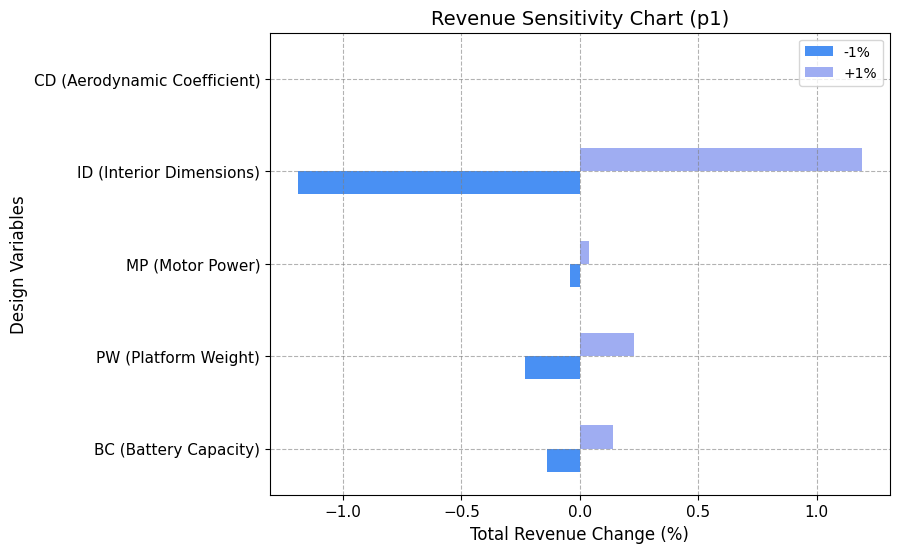

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

def sensitivity_analysis(x, price, demand, variable_names, perturbation=0.01):
    """
    Perform sensitivity analysis on the revenue function by perturbing each design variable by ±1%.

    Parameters:
        x (list): List of design variables [BC, PM, IO, MP, CD].
        price (float): Price of the product variant.
        demand (int): Demand for the product variant.
        variable_names (list): Names of the design variables.
        perturbation (float): Percentage change for sensitivity analysis (default: ±1%).

    Returns:
        DataFrame: Sensitivity results with percentage change in revenue for each variable.
    """
    # Convert x to a list if it's a tuple
    x = list(x)

    # Compute base revenue
    base_revenue = revenue(x, price, demand)
    sensitivity_results = []

    for i in range(len(x)):
        x_perturbed_up = x.copy()  # Ensure copies are independent
        x_perturbed_down = x.copy()

        # Increase and decrease the variable by perturbation percentage
        x_perturbed_up[i] *= (1 + perturbation)
        x_perturbed_down[i] *= (1 - perturbation)

        # Compute new revenues
        revenue_up = revenue(x_perturbed_up, price, demand)
        revenue_down = revenue(x_perturbed_down, price, demand)

        # Compute percentage change in revenue
        sensitivity_up = (4revenue_up - base_revenue) / base_revenue * 100
        sensitivity_down = (revenue_down - base_revenue) / base_revenue * 100

        sensitivity_results.append([variable_names[i], round(sensitivity_down, 2), round(sensitivity_up, 2)])

    # Convert results to DataFrame
    df_sensitivity = pd.DataFrame(sensitivity_results, columns=["Variable", "-1%", "+1%"])
    return df_sensitivity

# Define variable names for sensitivity analysis
variable_names = ["BC (Battery Capacity)", "PW (Platform Weight)", "MP (Motor Power)",
                  "ID (Interior Dimensions)", "CD (Aerodynamic Coefficient)"]

# Perform Sensitivity Analysis for Compact SUV (p1)
df_sensitivity_p1 = sensitivity_analysis(vehicle_variants["p1"], prices[0], demands[0], variable_names)

# Display formatted Sensitivity Analysis table
def display_styled_dataframe(df, title):
    styled_df = df.style.set_table_styles(
        [{'selector': 'th', 'props': [('font-size', '14px'), ('text-align', 'center'),
                                      ('background-color', '#4990F3'), ('color', 'white'), ('font-family', 'DM Sans')]},
         {'selector': 'td', 'props': [('font-size', '13px'), ('text-align', 'center'),
                                      ('background-color', '#9FADF2'), ('color', 'white'), ('font-family', 'DM Sans')]}]
    ).set_properties(**{'border': '1px solid black', 'padding': '8px'})

    display(HTML(f"<h3 style='color: #4990F3; font-family: DM Sans;'>{title}</h3>"))
    display(styled_df)

display_styled_dataframe(df_sensitivity_p1, "Revenue Sensitivity Analysis for Compact SUV (p1)")

# Plot Sensitivity Analysis Results
# Plot Sensitivity Analysis Results with Custom Formatting
fig, ax = plt.subplots(figsize=(8, 6))

# Use your colors for bars
df_sensitivity_p1.set_index("Variable").plot(kind="barh", ax=ax, color=["#4990F3", "#9FADF2"])

# Set labels and title with DM Sans
ax.set_xlabel("Total Revenue Change (%)", fontsize=12, color="black")
ax.set_ylabel("Design Variables", fontsize=12, color="black")
ax.set_title("Revenue Sensitivity Chart (p1)", fontsize=14, color="black")

# Custom grid styling
plt.grid(True, linestyle="--", alpha=0.6, color="gray")

# Set ticks font
plt.xticks(fontsize=11, color="black")
plt.yticks(fontsize=11, color="black")

# Show plot
plt.show()

# Change Propagation Analysis

GBM for Forecasting


+---+-----------------+---------------------------+---------------------------+------------------------------+--------------------+--------------------+
|   | Vehicle Variant | Initial Production Volume | Production Vol. Trend (α) | Volatility Coefficient (σ_v) |   Maximum Demand   | BIW Lines Required |
+---+-----------------+---------------------------+---------------------------+------------------------------+--------------------+--------------------+
| 0 |   Compact SUV   |           50000           |     4.640670015979054     |      28.389455226042067      | 898769.5208575693  |        9.0         |
| 1 |   Midsize SUV   |           40000           |     4.451083159910141     |      28.580534352445035      |  89291.5585351612  |        1.0         |
| 2 |  Full-size SUV  |           30000           |     4.93436451378253      |      24.288828609671036      | 252966.70458007013 |        3.0         |
+---+-----------------+---------------------------+---------------------------+---

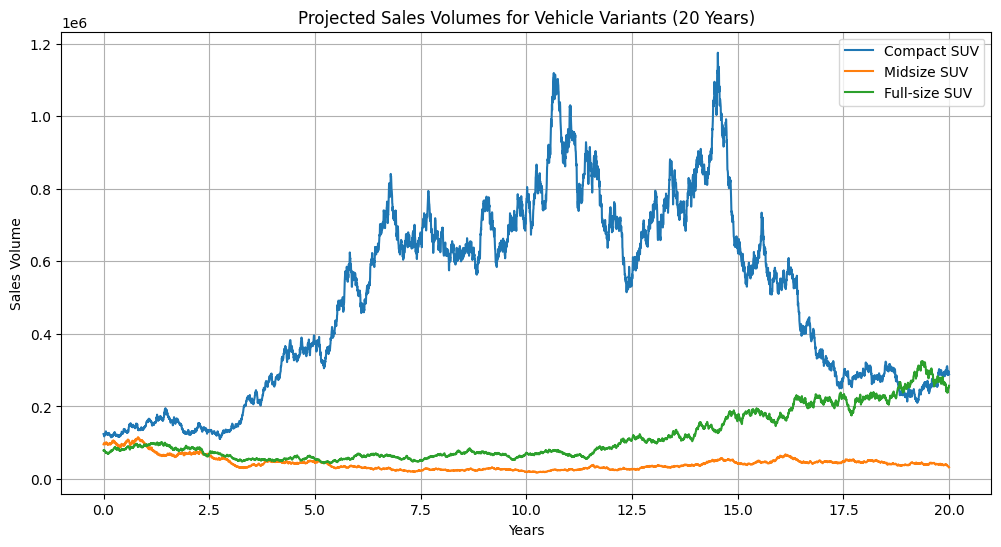

In [ ]:
# Step 1: Define initial sales data for each variant, including Initial Production Volume
vehicle_variants = {
    'p1': {'name': 'Compact SUV', 'initial_sales': 50000},
    'p2': {'name': 'Midsize SUV', 'initial_sales': 40000},
    'p3': {'name': 'Full-size SUV', 'initial_sales': 30000},
}

# Step 2: Generate synthetic historical sales data (10 years)
years = 20
np.random.seed(42)

for key, vehicle in vehicle_variants.items():
    growth_rates = np.random.normal(loc=0.05, scale=0.02, size=years)  # Mean growth rate = 5%, volatility = 2%
    sales = [vehicle['initial_sales']]
    for rate in growth_rates:
        sales.append(sales[-1] * (1 + rate))
    vehicle_variants[key]['sales'] = sales

# Step 3: Compute CAGR and Volatility
def calculate_cagr(sales):
    n = len(sales) - 1
    return (sales[-1] / sales[0]) ** (1/n) - 1

def calculate_volatility(sales):
    log_returns = np.diff(np.log(sales))
    return np.std(log_returns) * np.sqrt(252)  # Annualized volatility

for key, vehicle in vehicle_variants.items():
    sales = vehicle['sales']
    vehicle['cagr'] = calculate_cagr(sales)
    vehicle['volatility'] = calculate_volatility(sales)

# Step 4: Forecast Future Sales using GBM (20 years)
projection_years = 20
time_steps = 252 * projection_years  # Daily time steps
dt = 1 / 252  # Time increment per day

future_sales = {}
for key, vehicle in vehicle_variants.items():
    S0 = vehicle['sales'][-1]  # Last known sales
    mu = vehicle['cagr']
    sigma = vehicle['volatility']

    sales_projection = np.zeros(time_steps + 1)
    sales_projection[0] = S0

    for t in range(1, time_steps + 1):
        random_shock = np.random.normal(0, 1)
        sales_projection[t] = sales_projection[t - 1] * np.exp((mu - 0.5 * sigma**2) * dt + sigma * np.sqrt(dt) * random_shock)

    future_sales[key] = sales_projection

# Step 5: Determine Maximum Demand (95th percentile)
max_demand = {key: np.percentile(future_sales[key], 95) for key in future_sales}

# Step 6: Determine BIW Lines Required (Assume 1 line = 100,000 units capacity)
biw_lines = {key: np.ceil(max_demand[key] / 100000) for key in max_demand}

# Step 7: Create output DataFrame including Initial Production Volume
results_df = pd.DataFrame({
    "Vehicle Variant": [vehicle['name'] for vehicle in vehicle_variants.values()],
    "Initial Production Volume": [vehicle['initial_sales'] for vehicle in vehicle_variants.values()],
    "Production Vol. Trend (α)": [vehicle['cagr'] * 100 for vehicle in vehicle_variants.values()],
    "Volatility Coefficient (σ_v)": [vehicle['volatility'] * 100 for vehicle in vehicle_variants.values()],
    "Maximum Demand": max_demand.values(),
    "BIW Lines Required": biw_lines.values()
})

# Display results as a formatted table
import tabulate
print(tabulate.tabulate(results_df, headers='keys', tablefmt='pretty'))

# Step 8: Plot Sales Projections
plt.figure(figsize=(12, 6))
for key, vehicle in vehicle_variants.items():
    plt.plot(np.linspace(0, projection_years, time_steps + 1), future_sales[key], label=vehicle['name'])
plt.title("Projected Sales Volumes for Vehicle Variants (20 Years)")
plt.xlabel("Years")
plt.ylabel("Sales Volume")
plt.legend()
plt.grid(True)
plt.show()
